## <strong>Getting started</strong>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

First of all, let's mount our Google Drive on our runtime.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


With the Google Drive mounted, you can now store your image files (or any other file you wish, for that matter) in any directory of your choice in Drive, e.g.:

In [ ]:
images_dir = '/content/gdrive/My Drive/Teaching/2020-2021/Math for AI ML/SlidesLectureNotes'


## Motivation Example: balls in urns
Let us denote the proportion of black ball, or the probability of drawing a black ball as $\theta$, i.e.,$P(B) = \theta $ and $P(W) = 1- \theta $ for a white ball. 

Since each draw is Independent and identically distributed (I.I.D), we can calculate the probability of getting that sequence $D$ as the product of the probabilities of each of the individual draws:



$$
L(\theta|D) = \prod_{i=1}^{N}  \begin{cases}
\theta \; & \text{ if } d_i = B \\
1-\theta \; & \text{ if } d_i = W \\  
\end{cases}
$$



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 

D = 'BBWBWWBWWWBW'
idx = [pos for pos, char in enumerate(D) if char == 'B'] # Find the indices of 'B' in D
print(idx)
theta = 0.75 # black balls made up 75% of the urn
pp = np.array([1-theta] * len(D))
pp[np.array(idx)] = theta 

print(pp)
totalprobability = np.prod(pp)
s = 'Probability of sequence with ' + repr(theta) + ' black ball distribution: ' + repr(totalprobability) 
print(s)



[0, 1, 3, 6, 10]
[0.75 0.75 0.25 0.75 0.25 0.25 0.75 0.25 0.25 0.25 0.75 0.25]
Probability of sequence with 0.75 black ball distribution: 1.4483928680419922e-05


## Graph the likelihood
we can easily abstract this as a function of and θ, and graph the likelihood as a function of any value of the proportion of black balls from 0 to 1:

Text(0, 0.5, 'Likelihood')

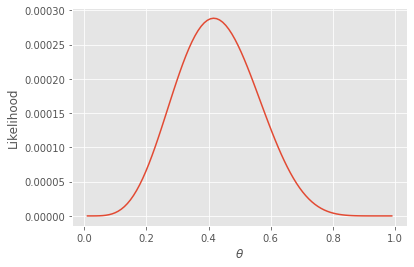

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 

# Define a function to calculate the probability of getting that sequence $D$ given the parameter $\theta$
def totalprob(theta, D): 
    idx = [pos for pos, char in enumerate(D) if char == 'B']
    pp = np.array([1-theta] * len(D))
    pp[np.array(idx)] = theta 
    totalprobability = np.prod(pp)
    return totalprobability

D = 'BBWBWWBWWWBW'
seqlen = len(D)
x = np.linspace(.01, .99, 100)
likelihoods  = []
for theta in x:
  likelihoods = np.append(likelihoods, totalprob(theta, D))

# Plot the figure
handle = plt.figure()
plt.style.use(['ggplot'])
plt.plot(x, likelihoods)
plt.xlabel(r'$\theta$')
plt.ylabel('Likelihood')

#handle.savefig(f"{images_dir}/Week-8-Lecture-5-Optimisation-Gradient-Descent/Likelihood.pdf", bbox_inches='tight')


## Cost function

The cost function, also known as the loss function or objective function, is the function that optimization works over – we want to find the optimal set of events to minimize the “cost” of those events.
	
This is extremely general, but has a one-to-one mapping with likelihood: for parameter fitting the cost function is often calculated as the negative logarithm of the likelihood function:

$$
C(\theta, D) = -\log(L(\theta|D))
$$



No handles with labels found to put in legend.


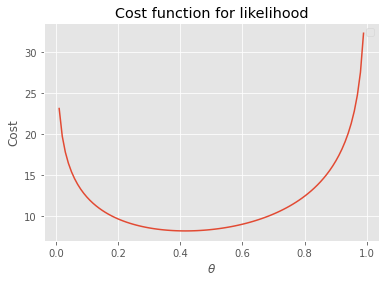

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 

def cost(theta, D): 
    idx = [pos for pos, char in enumerate(D) if char == 'B']
    pp = np.array([1-theta] * len(D))
    pp[np.array(idx)] = theta 
    totalprobability = np.prod(pp)
    return -np.log(totalprobability)

D = 'BBWBWWBWWWBW'
seqlen = len(D)
x = np.linspace(.01, .99, 100)
likelihoods  = []
for theta in x:
  likelihoods = np.append(likelihoods, cost(theta, D))

# Plot the figure
handle = plt.figure()
plt.style.use(['ggplot'])
plt.plot(x, likelihoods)
plt.xlabel(r'$\theta$')
plt.ylabel('Cost')
plt.title('Cost function for likelihood')
plt.legend()
plt.show()

#handle.savefig(f"{images_dir}/Week-8-Lecture-5-Optimisation-Gradient-Descent/cost.pdf", bbox_inches='tight')

## Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 

To find a local minimum of a function using gradient descent, we start at any value of $\theta$, then change the parameter in the direction that decreases the cost function, and keep repeating until there is only the tiniest decrease in cost with each step.

No handles with labels found to put in legend.


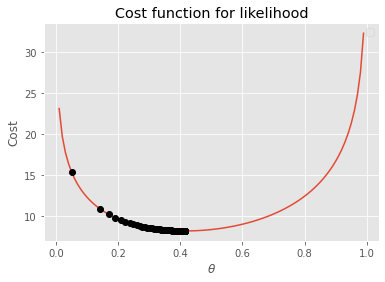

The local minimum occurs at 0.41607725188225936


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['ggplot'])


def urn_gradient(theta):
  gradient = (7/(1-theta) - 5/theta)
  return gradient

def cost(theta, D): 
    idx = [pos for pos, char in enumerate(D) if char == 'B']
    pp = np.array([1-theta] * len(D))
    pp[np.array(idx)] = theta 
    totalprobability = np.prod(pp)
    return -np.log(totalprobability)

iterations = 100
D = 'BBWBWWBWWWBW'
seqlen = len(D)
x = np.linspace(.01, .99, 100)
likelihoods  = []
for theta in x:
  likelihoods = np.append(likelihoods, cost(theta, D))

# Plot the figure
handle = plt.figure()
plt.style.use(['ggplot'])
plt.plot(x, likelihoods)
plt.xlabel(r'$\theta$')
plt.ylabel('Cost')
plt.title('Cost function for likelihood')
plt.legend()


cur_theta = 0.05 # The algorithm starts at x=3
eta = 0.001 # Learning rate
tau = 0.000001 #This tells us when to stop the algorithm
new_cost = cost(cur_theta, D);
prior_cost = new_cost

running = True
while running==True:
    plt.plot(cur_theta, new_cost, 'o', color='black')
    cur_theta = cur_theta - eta * urn_gradient(cur_theta) #Grad descent
    new_cost = cost(cur_theta, D);
    if(abs(new_cost - prior_cost)< tau):
      running = False
      #print("Iteration",iters,"\nX value is",cur_theta)
    else:
      prior_cost = new_cost
    #print("Iteration",iters,"\nX value is",cur_theta) #Print iterations
    
plt.show()
print("The local minimum occurs at", cur_theta)




## Optimisation: an example
We follow the book *Mathematics for Machine Learning* (pp. 225) to plot a continous function which has a global minimum global minimum around x = −4.5, with a function value of approximately −47. Since the function is “smooth,” the gradients can be used to help find the minimum by indicating whether we should take a step to the right or left. This assumes that we are in the correct bowl, as there exists another local local minimum minimum around x = 0.7.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


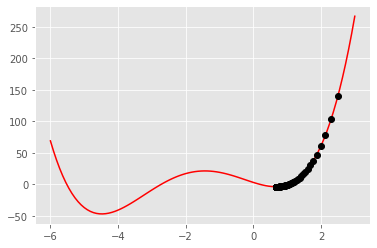

The local minimum occurs at 0.6630650770355391


In [ ]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
  
# Define the continous function l(x)
def arbi_cost(theta):
  return theta**4 + 7*theta**3 + 5*theta**2 - 17*theta + 3  

# Define the corresponding gradient
def arbi_gradient(theta): 
    return 4*theta**3 + 21*theta**2 +  10*theta -17 

thetas = np.linspace(-6,3,100)

# Plot the figure
handle = plt.figure()
plt.plot(thetas, arbi_cost(thetas), 'R')



cur_theta = 2.5 # The algorithm starts at x=3
eta = 0.001 # Learning rate
tau = 0.000001 #This tells us when to stop the algorithm
new_cost = arbi_cost(cur_theta);
prior_cost = new_cost

running = True
while running==True:
    plt.plot(cur_theta, new_cost, 'o', color='black')
    cur_theta = cur_theta - eta * arbi_gradient(cur_theta) #Grad descent
    new_cost = arbi_cost(cur_theta);
    if(abs(new_cost - prior_cost)< tau):
      running = False
    else:
      prior_cost = new_cost
    #print("Iteration",iters,"\nX value is",cur_theta) #Print iterations
    
plt.show()
print("The local minimum occurs at", cur_theta)

#handle.savefig(f"{images_dir}/Week-2-Lecture-6-Single-Variable Optimisation/Figure72.pdf", bbox_inches='tight')